In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.optim as optim

In [2]:
data_transform = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.405],
                         std=[0.229, 0.224, 0.225])])

data_test_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.405],
                         std=[0.229, 0.224, 0.225])])

In [3]:
train_dir = 'boat/train/'
test_dir = 'boat/test/'
dc_dataset = datasets.ImageFolder(root=train_dir,transform=data_transform)
trainloader = torch.utils.data.DataLoader(dc_dataset, batch_size=9,
                                           shuffle=True, num_workers=9)
dc_test_dataset = datasets.ImageFolder(root=test_dir,transform=data_test_transform)
testloader = torch.utils.data.DataLoader(dc_test_dataset, batch_size=9,
                                          shuffle=True, num_workers=9)

In [4]:
classes = ('buoy', 'cruise ship','ferry boat','freight boat','gondola','inflatable boat',
           'kayak','paper boat','sailboat')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sailboat cruise ship sailboat freight boat gondola sailboat cruise ship sailboat sailboat


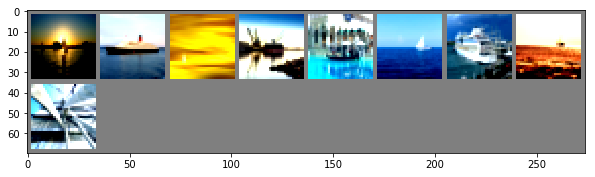

In [5]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.figure(figsize=(10,12))
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(9)))
plt.show()

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.021, momentum=0.9)


In [8]:
for epoch in range(1):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable (inputs), Variable (labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1000 ==999:   
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  kayak sailboat sailboat kayak  buoy kayak gondola cruise ship sailboat


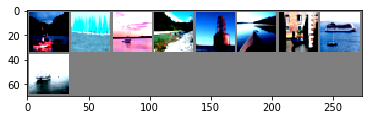

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(9)))

In [16]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [17]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(9)))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total))
net.zero_grad()    
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
print('Finished Training')


Predicted:  kayak sailboat sailboat kayak sailboat sailboat gondola sailboat sailboat
Accuracy of the network on the 10000 test images: 36 %
conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
Finished Training
